In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# predict BodyFat using Random Forest, XGBoost and Gradient Boosting
# then evaluate the models using mean squared error, mean aboslute and R^2
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_validate

In [2]:
# read from csv
df_1 = pd.read_csv('../../dataset/train/hwg_metadata.csv')
df_2 = pd.read_csv('../../dataset/train/measurements.csv')

# map the two dataframes by subject_id column
df = pd.merge(df_1, df_2, on='subject_id')
df.head()

,subject_id,gender,height_cm,weight_kg,ankle,arm-length,bicep,calf,chest,forearm,height,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist
0,AhfyGaD1BKo0-u6PeQk2oI-Bw5l0XxpAqNroFuZuy0I,female,160.00,92.4,23.537914,46.422310,35.570499,39.890522,121.831009,28.017199,160.889496,116.152130,72.071724,35.287865,62.321522,60.961720,110.685371,16.680916
1,E8tDQ5IgdBwbjLIXu7GwcupEHYbi0eB18YNcsgsSbP8,female,175.75,102.8,25.233662,53.050766,39.389599,42.416393,114.319115,29.861279,179.714294,123.125084,84.513443,36.191959,65.484894,67.980377,110.021660,17.281450
2,59bc2767681516389ccf45f9,male,174.80,106.9,26.049753,52.061996,37.847755,40.257854,117.639114,32.317181,178.127808,119.017868,80.541420,39.299343,68.521523,61.393036,107.807365,20.093870
3,nRatvgqbYTN77typTgGm4bAurxzpvf5nYg2Mb3gdh8c,male,181.50,111.8,28.310143,52.575706,35.370060,39.393135,121.468109,30.582531,184.160843,119.813774,82.444992,39.249149,71.878578,62.541759,118.219971,20.558201
4,fkq68ww6bdyKT16FavI1x_G-u7YZ9SoT1GNMUTSJUek,female,161.60,93.0,23.286049,46.116558,39.650200,39.964336,109.652184,29.167526,162.500900,122.022881,76.098457,35.913807,60.192699,71.169304,96.106842,17.549261


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   subject_id          2018 non-null   object 
 1   gender              2018 non-null   object 
 2   height_cm           2018 non-null   float64
 3   weight_kg           2018 non-null   float64
 4   ankle               2018 non-null   float64
 5   arm-length          2018 non-null   float64
 6   bicep               2018 non-null   float64
 7   calf                2018 non-null   float64
 8   chest               2018 non-null   float64
 9   forearm             2018 non-null   float64
 10  height              2018 non-null   float64
 11  hip                 2018 non-null   float64
 12  leg-length          2018 non-null   float64
 13  shoulder-breadth    2018 non-null   float64
 14  shoulder-to-crotch  2018 non-null   float64
 15  thigh               2018 non-null   float64
 16  waist 

In [4]:
# drop the subject_id, height column
df = df.drop(['subject_id', 'height'], axis=1)

# convert gender column: male to 1, female to 0
df['gender'] = df['gender'].map({ 'male': 1, 'female': 0 })
df.head()

,gender,height_cm,weight_kg,ankle,arm-length,bicep,calf,chest,forearm,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist
0,0,160.00,92.4,23.537914,46.422310,35.570499,39.890522,121.831009,28.017199,116.152130,72.071724,35.287865,62.321522,60.961720,110.685371,16.680916
1,0,175.75,102.8,25.233662,53.050766,39.389599,42.416393,114.319115,29.861279,123.125084,84.513443,36.191959,65.484894,67.980377,110.021660,17.281450
2,1,174.80,106.9,26.049753,52.061996,37.847755,40.257854,117.639114,32.317181,119.017868,80.541420,39.299343,68.521523,61.393036,107.807365,20.093870
3,1,181.50,111.8,28.310143,52.575706,35.370060,39.393135,121.468109,30.582531,119.813774,82.444992,39.249149,71.878578,62.541759,118.219971,20.558201
4,0,161.60,93.0,23.286049,46.116558,39.650200,39.964336,109.652184,29.167526,122.022881,76.098457,35.913807,60.192699,71.169304,96.106842,17.549261


In [5]:
# convert height_cm and weight_kg to BMI
df['BMI'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2
df = df.drop(['height_cm', 'weight_kg'], axis=1)
df.head()

,gender,ankle,arm-length,bicep,calf,chest,forearm,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist,BMI
0,0,23.537914,46.422310,35.570499,39.890522,121.831009,28.017199,116.152130,72.071724,35.287865,62.321522,60.961720,110.685371,16.680916,36.093750
1,0,25.233662,53.050766,39.389599,42.416393,114.319115,29.861279,123.125084,84.513443,36.191959,65.484894,67.980377,110.021660,17.281450,33.281466
2,1,26.049753,52.061996,37.847755,40.257854,117.639114,32.317181,119.017868,80.541420,39.299343,68.521523,61.393036,107.807365,20.093870,34.986045
3,1,28.310143,52.575706,35.370060,39.393135,121.468109,30.582531,119.813774,82.444992,39.249149,71.878578,62.541759,118.219971,20.558201,33.938180
4,0,23.286049,46.116558,39.650200,39.964336,109.652184,29.167526,122.022881,76.098457,35.913807,60.192699,71.169304,96.106842,17.549261,35.612317


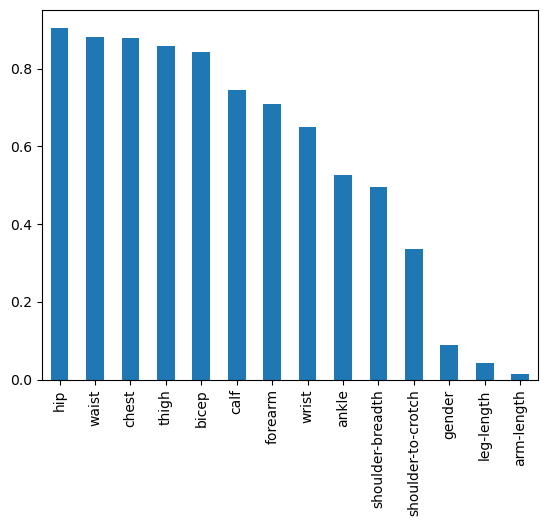

In [6]:
# show the absolute correlation between BMI and other features, order by descending
# then visualize the correlation and drop BMI in correlation
correlation = df.corr()['BMI'].abs().sort_values(ascending=False)
correlation.drop('BMI', inplace=True)
correlation.plot(kind='bar')
plt.show()

In [7]:
# get the features with correlation > 0.7
features = correlation[correlation > 0.7].index
X = df[features].astype(float)
y = df['BMI'].astype(float)

In [8]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# object to store the results for each model
mses = {'Gradient Boosting': [], 'XGBoost': [], 'Random Forest': []}
maes = {'Gradient Boosting': [], 'XGBoost': [], 'Random Forest': []}
r2s = {'Gradient Boosting': [], 'XGBoost': [], 'Random Forest': []}
best_params = {'Gradient Boosting': None, 'XGBoost': None, 'Random Forest': None}
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

Gradient Boosting
Mean Squared Error: 2.4172820424139188
R^2: 0.9003644213943529
Mean Absolute Error: 1.156875417290284


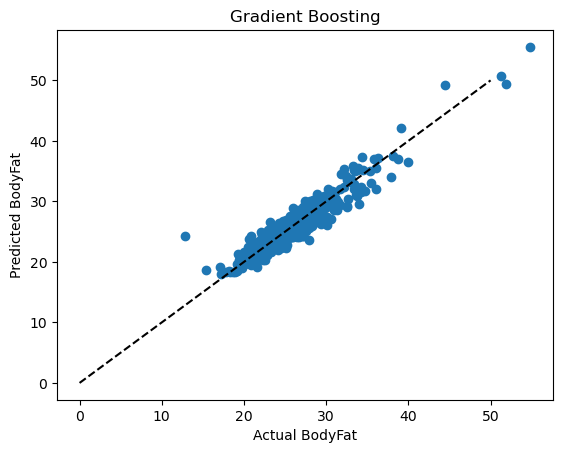

In [11]:
# Gradient Boosting, avoid overfitting using cross-validation, tune the hyperparameters in loops
# then fit the model and predict the test in every loop, save the best hyperparameters and model
best_score = 0
best_model = None

for n_estimators in [100, 200, 300]:
    for max_depth in [3, 4, 5]:
        for learning_rate in [0.01, 0.1, 0.3]:
          model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
          scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
          # save scoring to array
          mses['Gradient Boosting'].append(-scores['test_neg_mean_squared_error'].mean())
          maes['Gradient Boosting'].append(-scores['test_neg_mean_squared_error'].mean())
          r2s['Gradient Boosting'].append(scores['test_r2'].mean())
          if scores['test_r2'].mean() > best_score:
              best_score = scores['test_r2'].mean()
              best_model = model
              best_params['Gradient Boosting'] = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}

# fit the best model and predict the test
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# evaluate the model using mean squared error and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Gradient Boosting')
print('Mean Squared Error:', mse)
print('R^2:', r2)
print('Mean Absolute Error:', mae)

# plot the actual and predicted BodyFat
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Actual BodyFat')
plt.ylabel('Predicted BodyFat')
plt.title('Gradient Boosting')
plt.show()

XGBoost
Mean Squared Error: 2.451477798536951
R^2: 0.8989549400481986
Mean Absolute Error: 1.1658916414766214


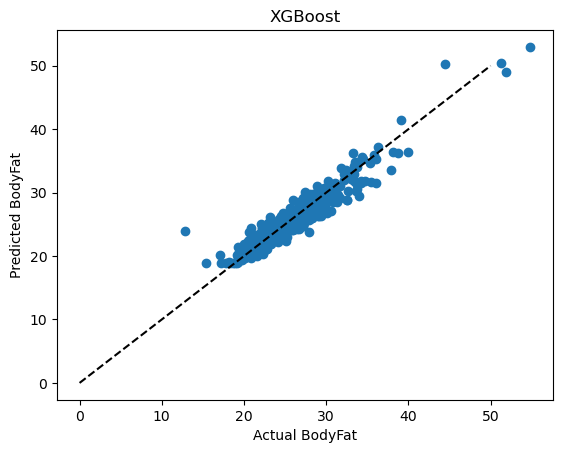

In [12]:
# XGBoost, avoid overfitting using cross-validation, tune the hyperparameters in loops
# then fit the model and predict the test in every loop, save the best hyperparameters and model
best_score = 0
best_model = None

for n_estimators in [100, 200, 300]:
    for max_depth in [3, 4, 5]:
        for learning_rate in [0.01, 0.1, 0.3]:
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
            scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=False)
            # save scoring to array
            mses['XGBoost'].append(-scores['test_neg_mean_squared_error'].mean())
            maes['XGBoost'].append(-scores['test_neg_mean_absolute_error'].mean())
            r2s['XGBoost'].append(scores['test_r2'].mean())

            if scores['test_r2'].mean() > best_score:
                best_score = scores['test_r2'].mean()
                best_model = model
                best_params['XGBoost'] = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# evaluate the model using mean squared error and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('XGBoost')
print('Mean Squared Error:', mse)
print('R^2:', r2)
print('Mean Absolute Error:', mae)

# plot the actual and predicted BodyFat
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Actual BodyFat')
plt.ylabel('Predicted BodyFat')
plt.title('XGBoost')
plt.show()

Random Forest
Mean Squared Error: 2.3473047860890546
R^2: 0.9032487453171836
Mean Absolute Error: 1.1581268276397925


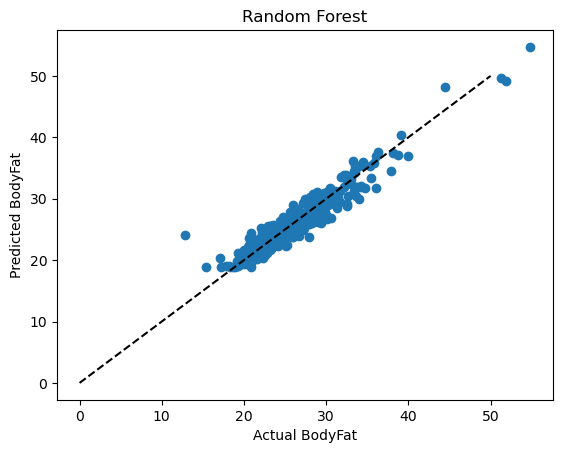

In [13]:
# Random Forest, avoid overfitting using cross-validation, tune the hyperparameters in loops
# then fit the model and predict the test in every loop, save the best hyperparameters and model
best_score = 0
best_model = None

for n_estimators in [100, 200, 300]:
    for max_depth in [3, 4, 5]:
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
        scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=False)
        # save scoring to array
        mses['Random Forest'].append(-scores['test_neg_mean_squared_error'].mean())
        maes['Random Forest'].append(-scores['test_neg_mean_absolute_error'].mean())
        r2s['Random Forest'].append(scores['test_r2'].mean())
        
        if scores['test_r2'].mean() > best_score:
            best_score = scores['test_r2'].mean()
            best_model = model
            best_params['Random Forest'] = {'n_estimators': n_estimators, 'max_depth': max_depth}

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# evaluate the model using mean squared error and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Random Forest')
print('Mean Squared Error:', mse)
print('R^2:', r2)
print('Mean Absolute Error:', mae)

# plot the actual and predicted BodyFat
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Actual BodyFat')
plt.ylabel('Predicted BodyFat')
plt.title('Random Forest')
plt.show()

In [14]:
# show the best each score, best params of each measure for each model
for model in ['Gradient Boosting', 'XGBoost', 'Random Forest']:
    print(f'{model}')
    print(f'Best Mean Squared Error: {min(mses[model])}')
    print(f'Best Mean Absolute Error: {min(maes[model])}')
    print(f'Best R^2 Score: {max(r2s[model])}')
    print(f'Best Params: {best_params[model]}')
    print()

Gradient Boosting
Best Mean Squared Error: 2.4636132675652354
Best Mean Absolute Error: 2.4636132675652354
Best R^2 Score: 0.8878484483858617
Best Params: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}

XGBoost
Best Mean Squared Error: 2.6348261005858062
Best Mean Absolute Error: 1.1434230766361084
Best R^2 Score: 0.8808235416509609
Best Params: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.01}

Random Forest
Best Mean Squared Error: 2.5232651688050405
Best Mean Absolute Error: 1.149428952144874
Best R^2 Score: 0.8851784969144522
Best Params: {'n_estimators': 100, 'max_depth': 5}



In [15]:
# show them in dataframe for comparison, with the index is models
pd.options.display.float_format = '{:,.4f}'.format
df = pd.DataFrame({'Mean Squared Error': [min(mses['Random Forest']), min(mses['Gradient Boosting']), min(mses['XGBoost'])],
                   'Mean Absolute Error': [min(maes['Random Forest']), min(maes['Gradient Boosting']), min(maes['XGBoost'])],
                   'R^2': [max(r2s['Random Forest']), max(r2s['Gradient Boosting']), max(r2s['XGBoost'])]},
                  index=['Gradient Boosting', 'XGBoost', 'Random Forest'])
df

,Mean Squared Error,Mean Absolute Error,R^2
Gradient Boosting,2.5233,1.1494,0.8852
XGBoost,2.4636,2.4636,0.8878
Random Forest,2.6348,1.1434,0.8808


In [16]:
# show the best hyperparameters for each model in dataframe for comparison
# convert so that the index is the models
df = pd.DataFrame(best_params).T
df

,n_estimators,max_depth,learning_rate
Gradient Boosting,100.0000,4.0000,0.1000
XGBoost,300.0000,4.0000,0.0100
Random Forest,100.0000,5.0000,NaN
